In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [3]:
common_settings = {
                  
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'mass function' : 'T08M200c',
    
'delta for matter density' : "200c",
'delta for electron density':"200c",   


    
'concentration parameter' : 'B13'
}



In [7]:
M = Class()
z_for_pk_hm = 1.
M.set(common_settings)

M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_em_at_z_1h,pk_em_at_z_2h',

'gas profile':'B16',
'gas profile mode' : 'agn',

'n_k_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,

'x_out_truncated_density_profile (electrons)': 1., # i.e., cuts at 1xr_200c

'use_xout_in_density_profile_from_enclosed_mass' : 1,
    
'non linear':'hmcode',
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
'f_free':0.9
    
})
M.compute()
pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_agn = M.pk_bb_at_z_hm()
pk_em_at_z_hm_agn = M.pk_em_at_z_hm()

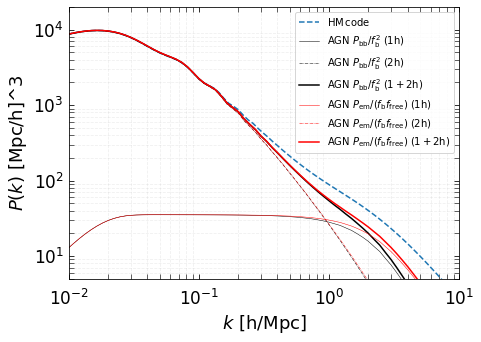

In [8]:

k_arr = np.geomspace(2e-3,1e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, ax = plt.subplots(1,1,figsize=(7,5))

z_arr = np.linspace(1e-8,4.,1000)

ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(5e0,2e4)
ax.set_xlim(1e-2,1e1)


ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{HM\,code}$',ls='--')



ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],(np.asarray(pk_bb_at_z_hm_agn['1h'])+np.asarray(pk_bb_at_z_hm_agn['2h']))*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='k',ls='-')


ax.plot(pk_em_at_z_hm_agn['k'],np.asarray(pk_em_at_z_hm_agn['1h'])*(M.get_f_b()*M.get_f_free())**-1.,label = '$\mathrm{AGN}$ $P_\mathrm{em}/(f_\mathrm{b}f_\mathrm{free})$ $\mathrm{(1h)}$',c='r',ls='-',lw=0.5)
ax.plot(pk_em_at_z_hm_agn['k'],np.asarray(pk_em_at_z_hm_agn['2h'])*(M.get_f_b()*M.get_f_free())**-1.,label = '$\mathrm{AGN}$ $P_\mathrm{em}/(f_\mathrm{b}f_\mathrm{free})$ $\mathrm{(2h)}$',c='r',ls='-.',lw=0.5)
ax.plot(pk_em_at_z_hm_agn['k'],(np.asarray(pk_em_at_z_hm_agn['1h'])+np.asarray(pk_em_at_z_hm_agn['2h']))*(M.get_f_b()*M.get_f_free())**-1.,label = '$\mathrm{AGN}$ $P_\mathrm{em}/(f_\mathrm{b}f_\mathrm{free})$ $\mathrm{(1+2h)}$',c='r',ls='-')




plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$P(k)$ [Mpc/h]^3")
plt.grid()
plt.legend(fontsize=10)

In [9]:
M.get_f_b()

0.15470606409572224

In [10]:
M.get_f_free()

0.9